##**STROKE PREDICTION MODEL**

##**Introduction**

Predicting stroke events is a critical endeavor in healthcare, aiming to enable early interventions and improve patient outcomes. This project embarks on creating a predictive model for stroke occurrences using a diverse set of demographic, lifestyle, and clinical attributes. Through meticulous data analysis, model development, and iterative enhancements, we strive to build a robust tool that can aid medical professionals in identifying individuals at risk.

###**Project Overview**

Problem statement:

Develop a model to predict stroke events using a supervised learning model.


Challenges:

1. Binary nature of the target variable (stroke).

2. Class imbalance with fewer stroke cases.


Approach:

- Apply data preprocessing and handle class imbalance.

- Progress to applying SMOTE and Gradient Boosting Classifier.

- Evaluate and interpret the model at each stage.


###**Source for Relevant Data**

Dataset was gotten online

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

###**Import libraries dataset**

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error as mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as mean_absolute_percentage_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

import pickle
from google.colab import files

import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("/content/drive/MyDrive/Pluralcode Data Science/healthcare-dataset-stroke-data.csv")


##**Data Exploration and Preprocessing**
Purpose: Uncover underlying patterns, detect anomalies, and gain insights into the data.

###**Exploratory Data Analysis**

####**Dataset Overview**

In [63]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


####**Dataset Statistics**

In [64]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


####**Missing Values**

In [65]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [66]:
# Handling Missing Values:

# Numerical Features:Impute missing values with the mean
# Categorical Features: Impute missing values with the mode

#fILL numerical column with mean values

# Select numeric columns - BMI column alone

df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [67]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


####**Data Visualization**

#####**Boxplot of BMI**

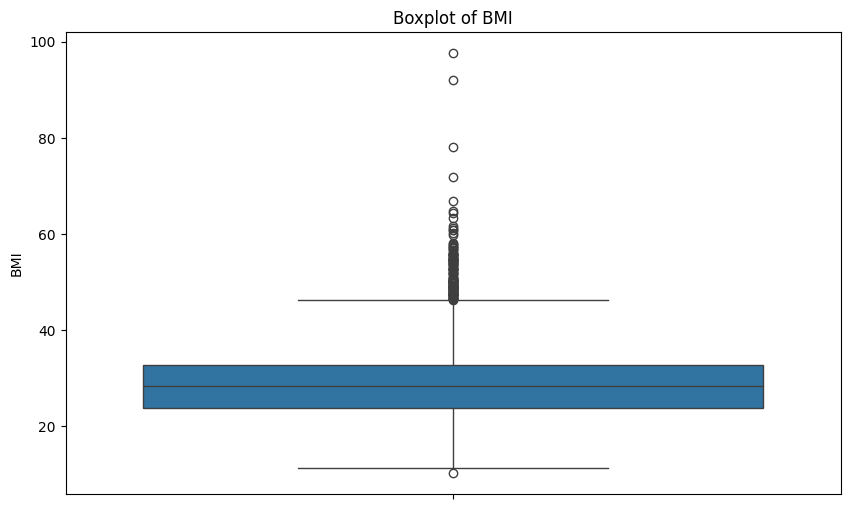

In [68]:
# boxplot of BMI

plt.figure(figsize=(10, 6))
sns.boxplot(df["bmi"])
plt.title("Boxplot of BMI")
plt.ylabel("BMI")
plt.show()

#####**Boxplot of Average Glucose Level**

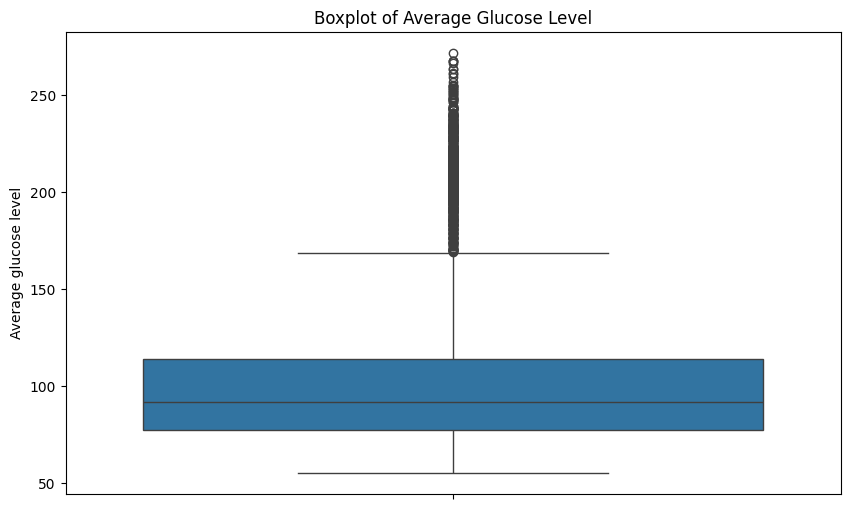

In [69]:
# boxplot of average glucose level

plt.figure(figsize=(10, 6))
sns.boxplot(df["avg_glucose_level"])
plt.title("Boxplot of Average Glucose Level")
plt.ylabel("Average glucose level")
plt.show()

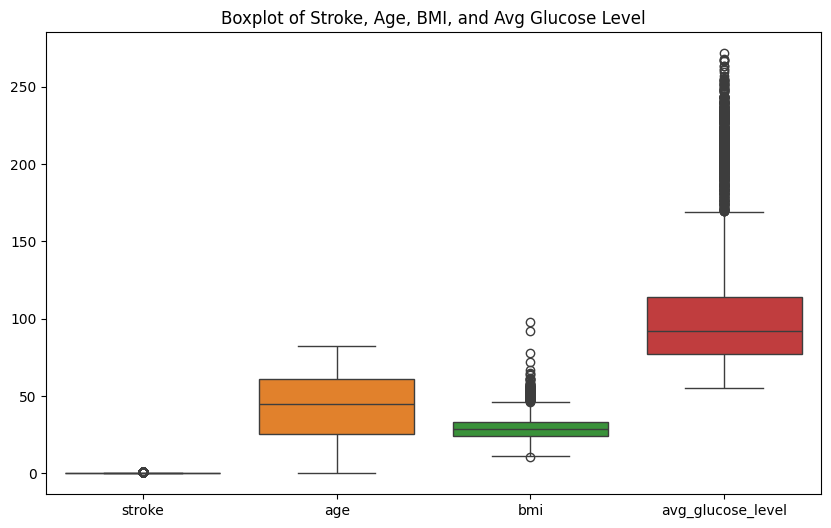

In [70]:
# Boxplot of specified columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[["stroke", "age", "bmi", "avg_glucose_level"]])
plt.title("Boxplot of Stroke, Age, BMI, and Avg Glucose Level")
plt.show()

#####**Scatterplot of BMI and Stroke**

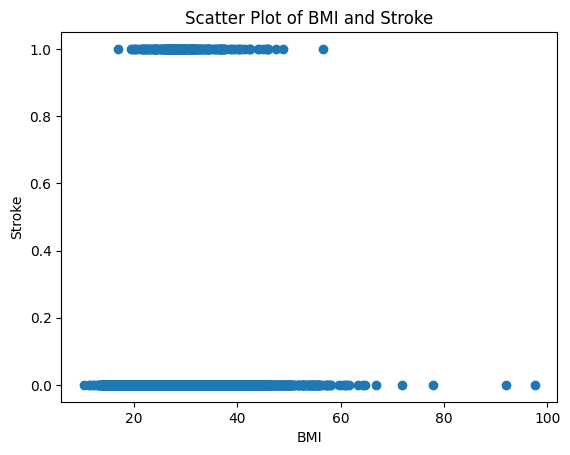

In [71]:
# scatterplot of BMI and Stroke

plt.scatter(x = df["bmi"],y = df["stroke"])
plt.title("Scatter Plot of BMI and Stroke")
plt.xlabel("BMI")
plt.ylabel("Stroke")
plt.show()

#####**Scatterplot of Age and Stroke**





Text(0, 0.5, 'Stroke')

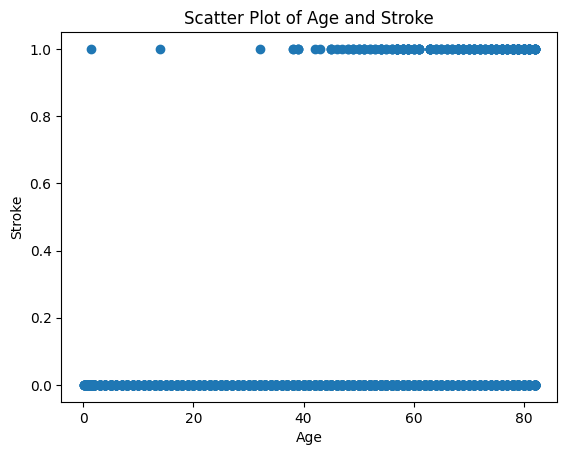

In [72]:
# scatterplot of Age and Stroke

plt.scatter(x = df["age"],y = df["stroke"])
plt.title("Scatter Plot of Age and Stroke")
plt.xlabel("Age")
plt.ylabel("Stroke")

#####**Pie Chart Stroke Categories**

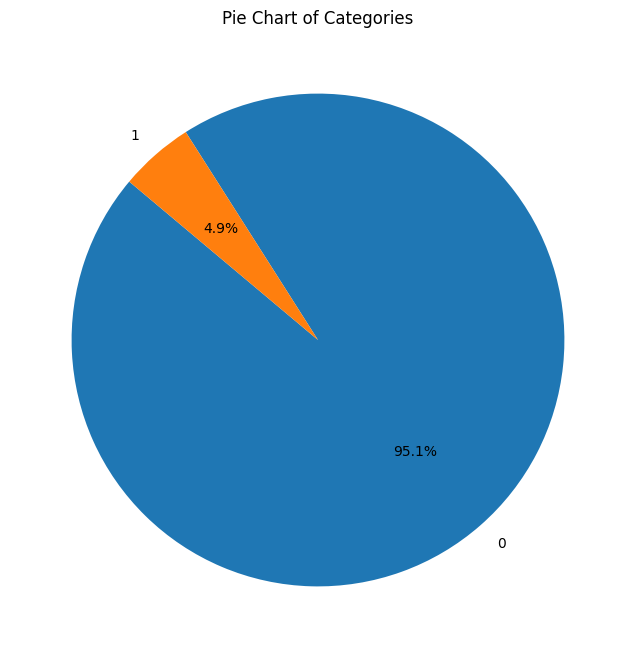

In [73]:
category_counts = df['stroke'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Categories')
plt.show()

####**Data Preprocessing**

In [74]:
print(pd.unique(df["stroke"]))  # Check unique values in 'y'
print(df["stroke"].value_counts())  # Count occurrences of each unique value in 'y'

[1 0]
stroke
0    4861
1     249
Name: count, dtype: int64


#####**Encoding Categorical Variables**

In [75]:
# Encode categorical variables

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode each categorical column
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print(df.head())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          2   
1  51676       0  61.0             0              0             1          3   
2  31112       1  80.0             0              1             1          2   
3  60182       0  49.0             0              0             1          2   
4   1665       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1  


#####**Correlation Plot and Matrix**

In [76]:
# Plotting the Correlation matrix
df[["stroke", "age", "bmi", "hypertension", "avg_glucose_level", "smoking_status",]].corr()

,stroke,age,bmi,hypertension,avg_glucose_level,smoking_status
stroke,1.000000,0.245257,0.038947,0.127904,0.131945,0.028123
age,0.245257,1.000000,0.325942,0.276398,0.238171,0.265199
bmi,0.038947,0.325942,1.000000,0.160189,0.168751,0.219148
hypertension,0.127904,0.276398,0.160189,1.000000,0.174474,0.111038
avg_glucose_level,0.131945,0.238171,0.168751,0.174474,1.000000,0.063437
smoking_status,0.028123,0.265199,0.219148,0.111038,0.063437,1.000000


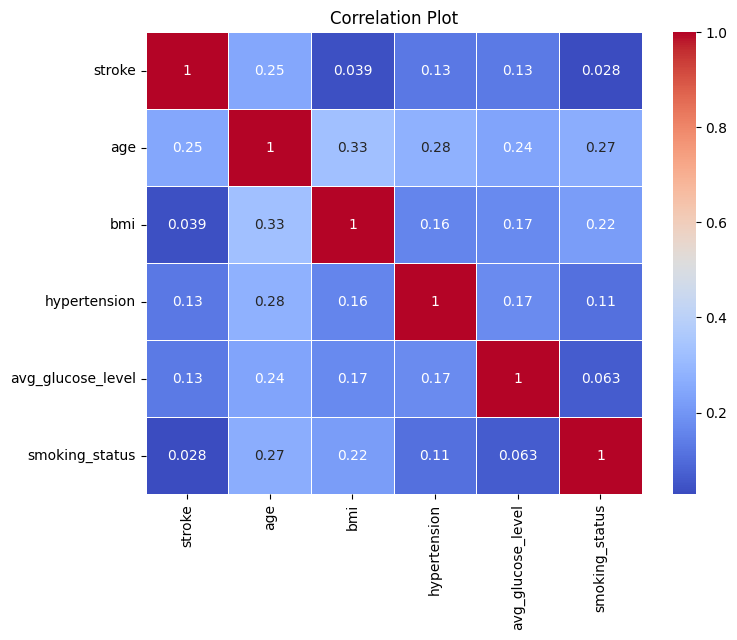

In [77]:
# Plotting the correlation matrix

corr = df[["stroke", "age", "bmi", "hypertension", "avg_glucose_level", "smoking_status"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Plot")
plt.show()

#####**Data Trimming**

In [78]:
# trimming the data to relevant columns

model_df = df[["stroke", "age", "bmi", "avg_glucose_level"]]
model_df

,stroke,age,bmi,avg_glucose_level
0,1,67.0,36.600000,228.69
1,1,61.0,28.893237,202.21
2,1,80.0,32.500000,105.92
3,1,49.0,34.400000,171.23
4,1,79.0,24.000000,174.12
...,...,...,...,...
5105,0,80.0,28.893237,83.75
5106,0,81.0,40.000000,125.20
5107,0,35.0,30.600000,82.99
5108,0,51.0,25.600000,166.29


##**Model Development**

###**Model Selection**

The model to use is Logistic Regression



###**Data Spliting**

In [79]:
# divide data into feature matrix and target vector

# Replace 'target' with the actual target column name
X = df[["age", "bmi", "avg_glucose_level"]]
y = df["stroke"]

In [80]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

###**Applying SMOTE**

In [81]:
# Apply SMOTE to the dataset

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_scaled, y)

In [82]:
# dividing data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


###**Baseline Model**

In [83]:
# create baseline
kf = 5
from sklearn.dummy import DummyRegressor

baseline_model = DummyRegressor(strategy="mean")

baseline_mae = -cross_val_score(baseline_model, X, y, cv=kf, scoring="neg_mean_absolute_error").mean().round(3)
# Get the predicted values for the training data
y_train_pred = baseline_model.fit(X_train, y_train).predict(X_train)
# Calculate and round the mean of the predicted values
print("The mean value of y_train values is:", round(y_train_pred.mean(), 3))
print("The baseline MAE is:", round(baseline_mae,3))

The mean value of y_train values is: 0.5
The baseline MAE is: 0.097


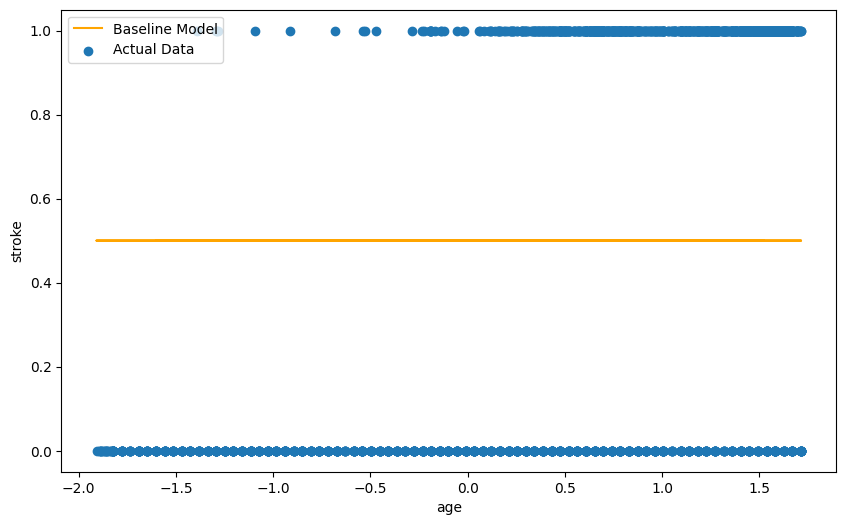

In [84]:
# visualizing the baseline on a scatterplot

# plot X_test against y_test_pred (predicted values for the test set)

plt.figure(figsize=(10, 6))

# Predict on the test set
y_test_pred = baseline_model.predict(X_test)

# Access elements using indexing instead of .values
plt.plot(X_test[:, 0], y_test_pred, color="Orange", label="Baseline Model") # Use the first column of X_test (age) for x-axis
plt.scatter(X_test[:, 0], y_test, label='Actual Data')  # Use the first column of X_test (age) for x-axis
plt.xlabel("age")
plt.ylabel("stroke")
plt.legend()
plt.show()

###**Build and Evaluate Model**

####**Model Fitting (Training)**

##**Using SMOTE and Gradient boost due to the highly unbalanced dataset**

In [85]:
# dividing data into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [86]:
# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [87]:
model_mae = -cross_val_score(model, X, y, cv=kf, scoring="neg_mean_absolute_error").mean().round(3)

model_mae

0.052

In [88]:
# model generates predictions off X_test values

model_test_pred = model.predict(X_test)

model_test_pred

array([0, 1, 0, ..., 1, 0, 1])

In [89]:
# Step 5: Evaluate the model on the test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model_test_pred = model.predict(X_test)
print(confusion_matrix(y_test, model_test_pred))
print(classification_report(y_test, model_test_pred))

[[1166  278]
 [  21   68]]
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1444
           1       0.20      0.76      0.31        89

    accuracy                           0.80      1533
   macro avg       0.59      0.79      0.60      1533
weighted avg       0.94      0.80      0.85      1533



##**Report Model Performance**

In [90]:
# print baseline and model's mae to compare

print("The baseline MAE is:\t\t", round(baseline_mae, 3))
print("The model MAE is:\t\t", round(model_mae, 3))

The baseline MAE is:		 0.097
The model MAE is:		 0.052


In [91]:
# use of linear equation

# step 1: calculate feature importance
# Access feature importances instead of coefficients
feature_importances = model.feature_importances_
rounded_feature_importances = np.round(feature_importances, 3)

# step 2: calculate intercept
# GradientBoostingClassifier doesn't have an intercept in the same way as linear models
# Instead, we can consider the average prediction as a proxy for the intercept
intercept = round(model.predict(X).mean(), 3)

# Instead of using coefficients, we'll use feature importances to show the relative importance of each feature
print("Model intercept (average prediction):\t", intercept)
print("Model feature importances:\t\t", rounded_feature_importances)

# Print an interpretation of the feature importances
print("Feature importance for age:\t\t", rounded_feature_importances[0])
print("Feature importance for bmi:\t\t", rounded_feature_importances[1])
print("Feature importance for avg_glucose_level:", rounded_feature_importances[2])

Model intercept (average prediction):	 0.01
Model feature importances:		 [0.859 0.083 0.058]
Feature importance for age:		 0.859
Feature importance for bmi:		 0.083
Feature importance for avg_glucose_level: 0.058


##**Model Deployment**

In [92]:
with open("model.pkl", "wb") as f:
  pickle.dump(model, f)

In [93]:
# check if model.pkl was created

!ls

app.py	drive  model1.pkl  model.pkl  requirements.txt	sample_data


In [94]:
# Saving model.pkl to computer drive

files.download("model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Save file containing Streamlit code to local drive**

In [95]:
# streamlit code

%%writefile app.py

import pickle
import streamlit as st
import pandas as pd

# load the file that contains the model (model.pkl)
with open("model.pkl", "rb") as f:
  prediction = pickle.load(f)

# give the Streamlit app page a title
st.title("Stroke Predictor")

# input widget for getting user values for X (feature matrix value)
age = st.slider("age", min_value=0, max_value=100, value=0)
bmi = st.slider("bmi", min_value=0, max_value=100, value=10)
avg_glucose_level = st.slider("avg_glucose_level", min_value=0, max_value=500, value=50)

# After selecting stroke, the user then submits the stroke value
if st.button("Predict"):
  # take the stroke value, and format the value the right way
    prediction = model.predict([[age, bmi, avg_glucose_level]])[0].round(0)
  # Map the prediction to the corresponding message
    if prediction == 0:
      status = "No stroke"
    else:
      status = "Stroke"

# Display the result on the Streamlit app
st.write("The predicted stroke status is", status)

Overwriting app.py


In [96]:
# check if app.py has been created on google drive

!ls

app.py	drive  model1.pkl  model.pkl  requirements.txt	sample_data


In [97]:
# download app.py to local directory

files.download("app.py")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
# creating requirements.txt file

%%writefile requirements.txt

pickle4
streamlit
pandas
scikit-learn


Overwriting requirements.txt


In [99]:
# download the requirements .txt

files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>